# Notes

## Git

Go to directory you want to clone repository in then clone ```git clone https://github.com/alexanderfache6/dronezz.git```

To see any changes you have made ```git status```

To add all your changes ```git add .```

Then you can type ```git status``` and you'll see everything turn green

To commit ```git commit -m "TYPE YOUR MESSAGE HERE. SUCH AS WHAT CHANGES YOU MADE"```

Then to push to the repository ```git push origin master``` and you'll probably have to type in your GitHub password

To pull/get changes ```git pull origin master``` from within the dronezz GitHub folder.


## Code

Pull from GitHub. Let's put all of our code within the ```code``` folder. Within the "missions" folder there is a directory for every mission ("mission_2", etc). Within each directory are the following files

- mission_2_aligned_image.png


- mission_2_aligned_region_image_BUILDING.npy
- mission_2_aligned_region_image_GRASS.npy
- mission_2_aligned_region_image_GRAVEL.npy
- mission_2_aligned_region_image_SIDEWALK.npy

- mission_2_aligned_region_mask_BUILDING.npy
- mission_2_aligned_region_mask_GRASS.npy
- mission_2_aligned_region_mask_GRAVEL.npy
- mission_2_aligned_region_mask_SIDEWALK.npy

- mission_2_aligned_sample_image_BUILDING.npy
- mission_2_aligned_sample_image_GRASS.npy
- mission_2_aligned_sample_image_GRAVEL.npy
- mission_2_aligned_sample_image_SIDEWALK.npy

- mission_2_aligned_sample_mask_BUILDING.npy
- mission_2_aligned_sample_mask_GRASS.npy
- mission_2_aligned_sample_mask_GRAVEL.npy
- mission_2_aligned_sample_mask_SIDEWALK.npy


- mission_2_normalized_image.png


- mission_2_normalized_region_image_BUILDING.npy
- mission_2_normalized_region_image_GRASS.npy
- mission_2_normalized_region_image_GRAVEL.npy
- mission_2_normalized_region_image_SIDEWALK.npy

- mission_2_normalized_region_mask_BUILDING.npy
- mission_2_normalized_region_mask_GRASS.npy
- mission_2_normalized_region_mask_GRAVEL.npy
- mission_2_normalized_region_mask_SIDEWALK.npy

- mission_2_normalized_sample_image_BUILDING.npy
- mission_2_normalized_sample_image_GRASS.npy
- mission_2_normalized_sample_image_GRAVEL.npy
- mission_2_normalized_sample_image_SIDEWALK.npy

- mission_2_normalized_sample_mask_BUILDING.npy
- mission_2_normalized_sample_mask_GRASS.npy
- mission_2_normalized_sample_mask_GRAVEL.npy
- mission_2_normalized_sample_mask_SIDEWALK.npy

Down below is a setup to load these files and to display them.

# Imports and Functions

In [1]:
import copy
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
REGION_NAMES = ['GRASS', 'SIDEWALK', 'BUILDING', 'GRAVEL']

REFERENCE_MISSION = 2

In [3]:
def plot_images(image_list, title_list=[], grid='off'):
    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(10*len(image_list), 10*1))
    if len(image_list) == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        if len(title_list) > 0:
            ax.set_title(title_list[i])
        ax.axis(grid)

In [4]:
def plot_mission_region_sample_images(mission_numbers, mission_images=[], region_images=[], sample_images=[], display_missions=True, display_regions=True, display_samples=True):
    if display_missions:
        if len(mission_images) > 0:
            print('Displaying missions')
            plot_images(mission_images, ['Mission ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No mission images available to display')
    
    if display_regions:
        if len(region_images) > 0:
            print('Displaying regions')
            plot_images(region_images, ['Region ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No region images available to display')
    
    if display_samples:
        if len(sample_images) > 0:
            print('Displaying samples')
            plot_images(sample_images, ['Sample ' + str(mission_number) for mission_number in mission_numbers])
        else:
            print('[Error] No sample images available to display')

In [5]:
def get_mission_file_path(mission_number):
    return '..\\missions\\mission_' + str(mission_number) + '\\mission_' + str(mission_number) + '_'

In [6]:
def get_global_image(mission_number, get_normalized=True):
    if get_normalized:
        mission = np.load(get_mission_file_path(mission_number) + 'normalized_image.npy')
    else:
        mission = np.load(get_mission_file_path(mission_number) + 'aligned_image.npy')
    
    return mission

In [7]:
def get_region_and_sample_image(mission_number, region_name, get_normalized=True):
    if get_normalized:
        region = np.load(get_mission_file_path(mission_number) + 'normalized_region_image_' + region_name + '.npy')
        sample = np.load(get_mission_file_path(mission_number) + 'normalized_sample_image_' + region_name + '.npy')
    else:
        region = np.load(get_mission_file_path(mission_number) + 'aligned_region_image_' + region_name + '.npy')
        sample = np.load(get_mission_file_path(mission_number) + 'aligned_sample_image_' + region_name + '.npy')
    
    return region, sample

# Start

In [8]:
# load mission images, region images, sample images for given missions and a region

# select mission numbers and region type
mission_numbers = [2, 3, 4, 5, 6]
region_type = 'GRASS'
get_normalized = True

In [9]:
mission_images = []
region_images = []
sample_images = []

for mission_number in mission_numbers:
    # load mission images
    mission_image = get_global_image(mission_number, get_normalized)
    mission_images.append(mission_image)
    
    # load region images and sample images
    region_image, sample_image = get_region_and_sample_image(mission_number, region_type, get_normalized)
    region_images.append(region_image)
    sample_images.append(sample_image)

# all lengths and dimensions should match
print(len(mission_images))
print(mission_images[0].shape)
print(len(region_images))
print(region_images[0].shape)
print(len(sample_images))
print(sample_images[0].shape)

5
(538, 470, 3)
5
(538, 470, 3)
5
(538, 470, 3)


Displaying missions
Displaying regions
Displaying samples


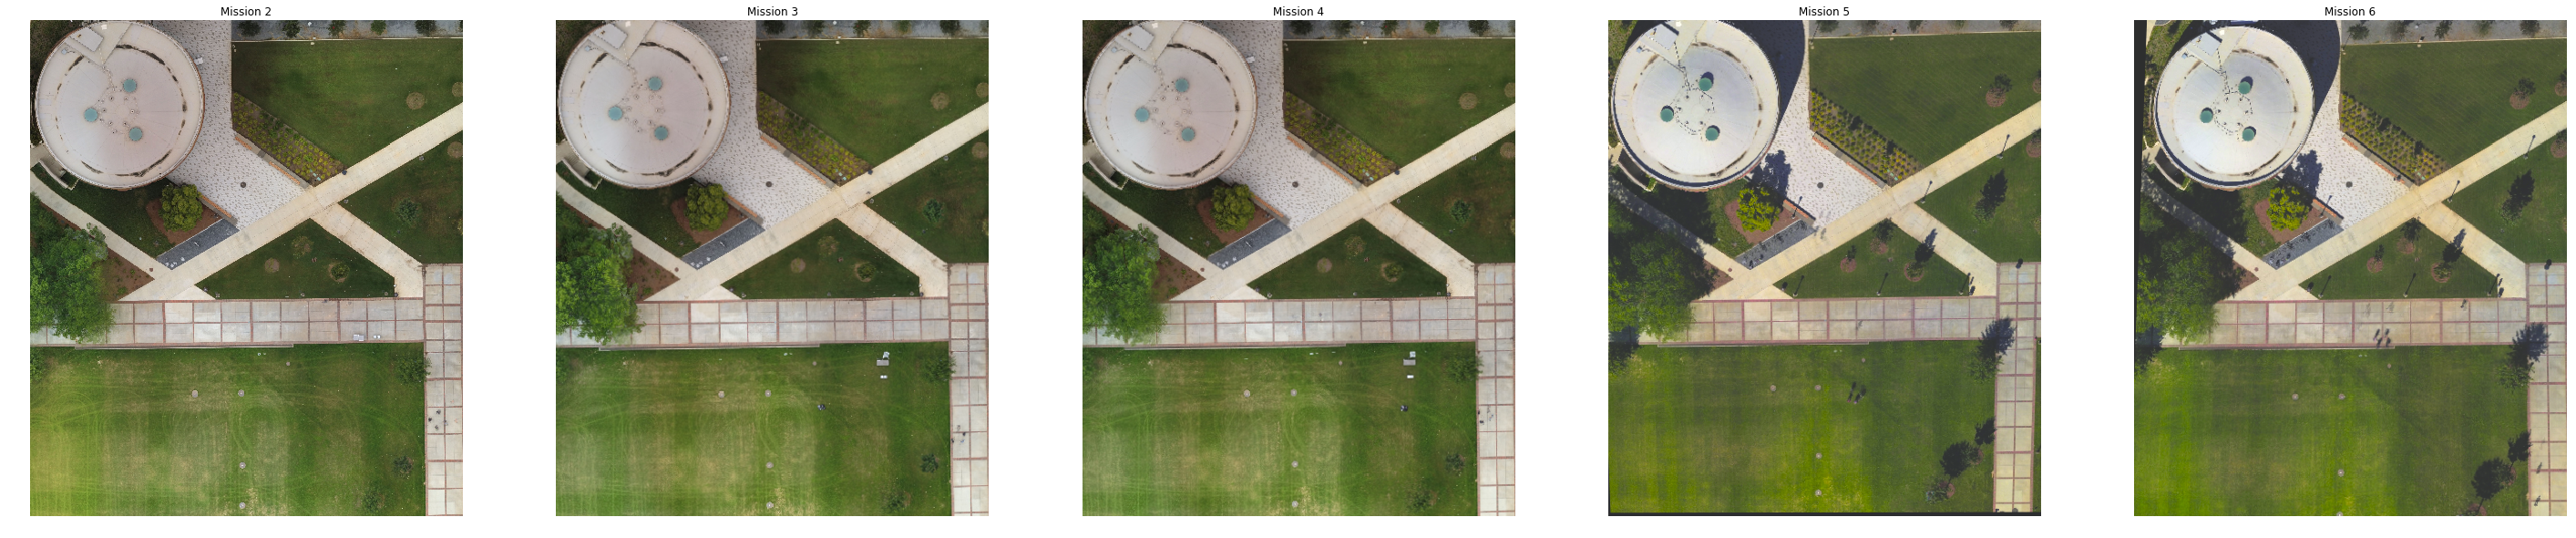

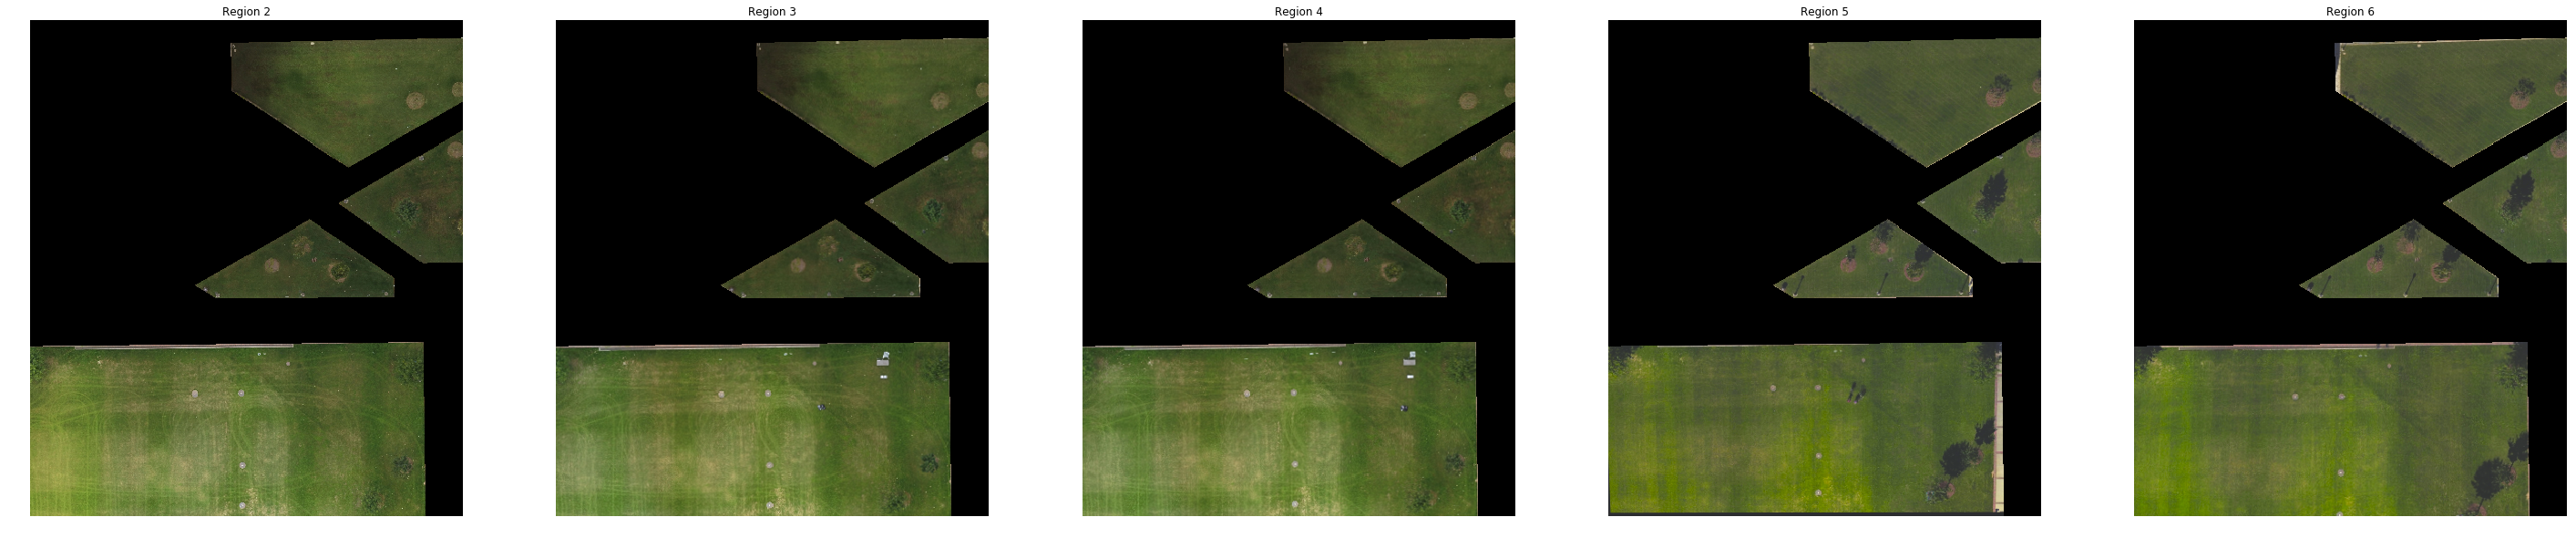

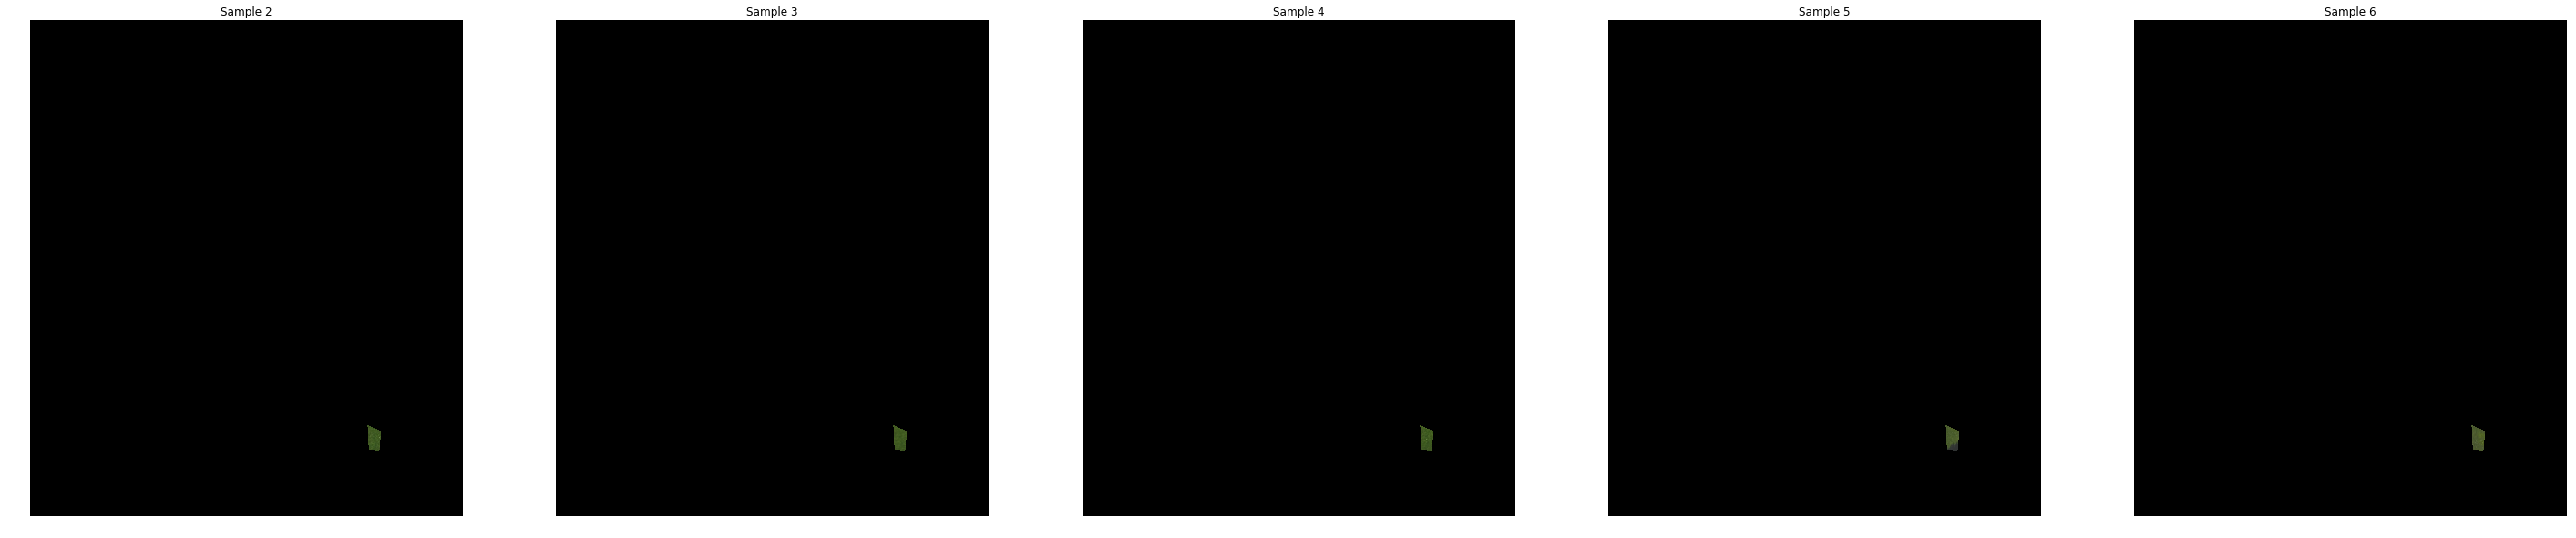

In [10]:
# display the mission images, region images, sample images
# don't change "mission_numbers, mission_images=mission_images, region_images=region_images, sample_images=sample_images"
# change "display_missions=True, display_regions=True, display_samples=True" to True or False depending on what you want displayed

plot_mission_region_sample_images(mission_numbers, mission_images=mission_images, region_images=region_images, sample_images=sample_images, display_missions=True, display_regions=True, display_samples=True)

# Detect Anomalies